# Data 118 - Winter 2022
# Homework 7: A/B testing and fuzzy matching (50 points)

**Reading**: Textbook chapter [12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 7 is due Tuesday, March 8 at 9:00am. Late work will not be accepted without prior arrangements.  

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd
import os
import sys
import io
import scipy
from scipy import stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. Birth weight data (25 points)

We discussed in class a dataset that contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy. 


In [2]:
baby_df = pd.read_csv('baby.csv')
print(baby_df.shape)
baby_df.head(5)

(1174, 6)


,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


The analysis in class (a permutation test for the difference in means) showed that there is strong evidence for unequal distributions of birth weights for smoker and non-smoker mothers. Here we will investigate differences in BMI between mothers who smoked and did not.

Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters.  BMI can be used to screen for weight categories that may lead to health problems but it is not diagnostic of the health of an individual.

#### Question 1

Calculate the BMI for the mothers in this dataset add it as a column called `bmi`

In [3]:
orig_bmi = []
def convert_to_bmi(num):
    return (baby_df['Maternal Pregnancy Weight'][i]/2.2)/((baby_df['Maternal Height'][i]*0.0254)**2)
for i in range(1174):
    orig_bmi.append(convert_to_bmi(i))
bmi_array = np.asarray(orig_bmi)
bmi = pd.DataFrame(bmi_array, columns = ['bmi'])
bmi

,bmi
0,18.328482
1,23.221149
2,19.780979
3,19.618703
4,17.045489
...,...
1169,19.570746
1170,18.833955
1171,25.013498
1172,18.343232


In [4]:
baby_df["bmi"] = bmi 
baby_df

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
0,120,284,27,62,100,False,18.328482
1,113,282,33,64,135,False,23.221149
2,128,279,28,64,115,True,19.780979
3,108,282,23,67,125,True,19.618703
4,136,286,25,62,93,False,17.045489
...,...,...,...,...,...,...,...
1169,113,275,27,60,100,False,19.570746
1170,128,265,24,67,120,False,18.833955
1171,130,291,30,65,150,True,25.013498
1172,125,281,21,65,110,False,18.343232


(array([  9.,  37., 147., 238., 267., 160., 112.,  62.,  45.,  33.,  24.,
         11.,   9.,   6.,   7.,   1.,   1.,   2.,   1.,   2.]),
 array([15.69496243, 16.93198561, 18.1690088 , 19.40603198, 20.64305516,
        21.88007834, 23.11710152, 24.3541247 , 25.59114788, 26.82817106,
        28.06519425, 29.30221743, 30.53924061, 31.77626379, 33.01328697,
        34.25031015, 35.48733333, 36.72435651, 37.9613797 , 39.19840288,
        40.43542606]),
 <BarContainer object of 20 artists>)

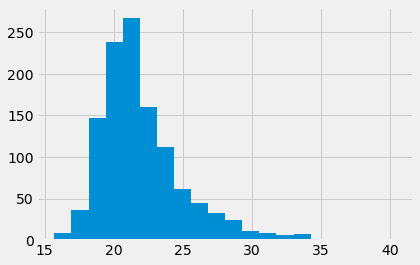

In [5]:
plt.hist(baby_df["bmi"], bins=20)

#### Question 2

Generate two plots: (i) overlapping histograms of mother BMI for smokers and non-smokers; (ii) back-to-back boxplots of mother BMI for smokers and non-smokers.

Interpret the plots.


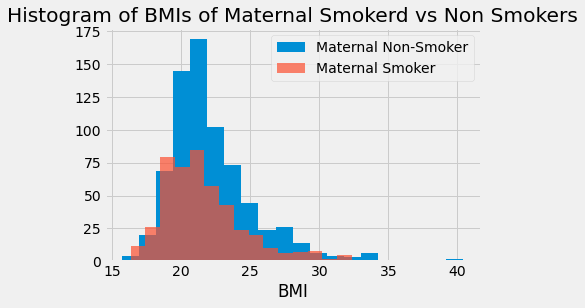

In [6]:
#histograms
bmi_smoker = baby_df[baby_df['Maternal Smoker']==True]['bmi']
bmi_nonsmoker = baby_df[baby_df['Maternal Smoker']==False]['bmi']

plt.hist(bmi_nonsmoker, bins=20,label='Maternal Non-Smoker')
plt.hist(bmi_smoker, alpha = 0.7,bins=20,label='Maternal Smoker')
plt.title('Histogram of BMIs of Maternal Smokerd vs Non Smokers')
plt.xlabel('BMI')
plt.legend()

Text(0, 0.5, 'BMI')

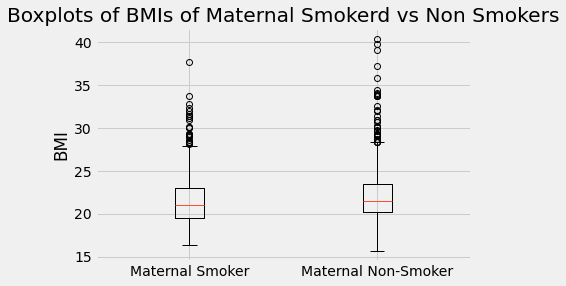

In [7]:
#boxplots
#ax = plt.subplots()
a = bmi_smoker
b = bmi_nonsmoker
plt.boxplot([a,b], labels= ["Maternal Smoker", "Maternal Non-Smoker"])
plt.title('Boxplots of BMIs of Maternal Smokerd vs Non Smokers')
plt.ylabel('BMI')

#### Question 3 (quantile plots)

Plot the empirical inverse cumulative distribution (quanitle plots) of BMI for the smoker and nonsmoker subsets.  Make sure you label the two groups and the axes.  Interpret the result.

In [8]:
xfine= np.arange(0,1,.001)

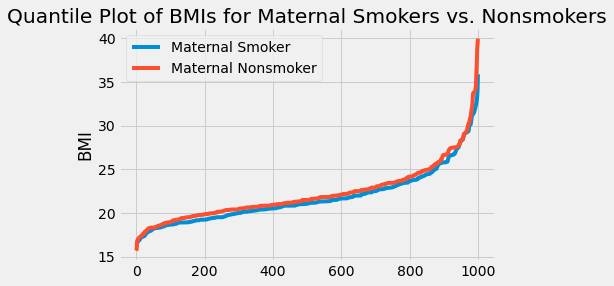

In [9]:
smoker_q = np.quantile(bmi_smoker,xfine)
nonsmoker_q = np.quantile(bmi_nonsmoker,xfine)
plt.plot(smoker_q, label='Maternal Smoker')
plt.plot(nonsmoker_q, label='Maternal Nonsmoker')
plt.title('Quantile Plot of BMIs for Maternal Smokers vs. Nonsmokers')
plt.ylabel('BMI')
plt.legend()
#scipy.stats.probplot(smoker_q)

In [10]:
baby_df["Maternal Smoker"].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

In [11]:
# We have 715 nonsmokers and 459 smokers in the dataset.

#### Question 4 (difference of sample means)

We want to investigate if the distributions of the BMI in mothers who smoke and mother who do not smoke are the same. 

Consider the null hypothesis that the two types are in fact drawn from the same distribution.  This is something we can assume and make calculations from.

Let us first examine the following test statistic: **the difference in BMI sample means** (between smokers and non-smokers).  

You can start by randomly permuting the rows of baby_df:


In [12]:
scrambledbaby_df = baby_df.iloc[np.random.permutation(len(baby_df))]
scrambledbaby_df

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
274,119,294,34,59,105,False,21.251773
1155,146,319,28,66,145,False,23.452547
678,139,275,33,62,118,False,21.627609
894,136,261,24,65,110,False,18.343232
1079,137,276,25,64,127,False,21.845081
...,...,...,...,...,...,...,...
909,117,272,32,66,118,False,19.085521
108,121,264,32,66,145,False,23.452547
1026,137,277,41,65,126,False,21.011338
261,109,295,23,63,103,True,18.283781


In [13]:
scrambledbaby_df2 = baby_df.copy()
scrambledbaby_df2_column = baby_df['Maternal Smoker'].sample(1174,replace=False).reset_index(drop=True)
scrambledbaby_df2['Scrambled Maternal Smoker'] = scrambledbaby_df2_column
scrambledbaby_df2

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi,Scrambled Maternal Smoker
0,120,284,27,62,100,False,18.328482,False
1,113,282,33,64,135,False,23.221149,False
2,128,279,28,64,115,True,19.780979,True
3,108,282,23,67,125,True,19.618703,False
4,136,286,25,62,93,False,17.045489,False
...,...,...,...,...,...,...,...,...
1169,113,275,27,60,100,False,19.570746,False
1170,128,265,24,67,120,False,18.833955,True
1171,130,291,30,65,150,True,25.013498,False
1172,125,281,21,65,110,False,18.343232,False


Then divide this into "scrambled-nonsmoker" and "scrambled-smoker" samples of size 715 and 459 .
The distribution of the differences of the means of the scrambled-smoker and scrambled-nonsmoker groups
give you the distribution of the difference-of-sample-means test statistic when the distributions are the same
and contain all of the values of the observed data.

Write the code that generates a null distribution for this test statistic and calculate the p-value associated with this test statistic.

In [14]:
q4_smoker = baby_df['bmi'].loc[baby_df['Maternal Smoker'] == True]
q4_nonsmoker = baby_df['bmi'].loc[baby_df['Maternal Smoker'] == False]
print(q4_smoker.mean())
print(q4_nonsmoker.mean())

21.744720625356333
22.240430393603972


In [15]:
scrambledbaby_smoker = scrambledbaby_df2.sample(715)
scrambledbaby_nonsmoker = scrambledbaby_df2.sample(459)
smoker_sample = scrambledbaby_smoker.bmi
nonsmoker_sample = scrambledbaby_nonsmoker.bmi
smoker_sample_means = scrambledbaby_smoker.bmi.mean()
nonsmoker_sample_means = scrambledbaby_nonsmoker.bmi.mean()
stats.ttest_ind(nonsmoker_sample,smoker_sample)

Ttest_indResult(statistic=-0.010746518017424293, pvalue=0.9914275131675264)

In [16]:
obs_means = baby_df.groupby('Maternal Smoker').mean()['bmi']
diff_obs_means = obs_means.iloc[0]-obs_means.iloc[1]
obs_means

Maternal Smoker
False    22.240430
True     21.744721
Name: bmi, dtype: float64

In [17]:
mean_differences = np.array([])
for i in np.arange(1000):
    scrambledbaby_df2 = baby_df.copy()
    scrambledbaby_df2_column = baby_df['Maternal Smoker'].sample(1174,replace=False).reset_index(drop=True)
    scrambledbaby_df2['Scrambled Maternal Smoker'] = scrambledbaby_df2_column
    q4_df = scrambledbaby_df2.groupby('Scrambled Maternal Smoker').mean()
    mean_diff_orig = q4_df['bmi'].iloc[1] - q4_df['bmi'].iloc[0]
    mean_differences = np.append(mean_differences,mean_diff_orig)
emp_p_mean = np.count_nonzero(mean_differences>=diff_obs_means)/1000
print(emp_p_mean)
print(diff_obs_means)

0.006
0.49570976824763946


#### Question 5 (medians)

Repeat what is asked in Question 3 for the following test statistic: **the difference in BMI sample medians**.

In [18]:
obs_medians = baby_df.groupby('Maternal Smoker').median()['bmi']
diff_obs_medians = obs_medians.iloc[0]-obs_medians.iloc[1]
obs_medians

Maternal Smoker
False    21.501064
True     21.077755
Name: bmi, dtype: float64

In [19]:
scrambledbaby_df2.groupby('Scrambled Maternal Smoker').median()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
Scrambled Maternal Smoker,,,,,,,
False,120,280,26,64,125,False,21.280191
True,119,280,27,64,125,False,21.479005


In [20]:
# this cell (or cells if you need more than one) contains the code for generating 
# the null distribution and the p-value
median_differences = np.array([])
for i in np.arange(1000):
    scrambledbaby_df2 = baby_df.copy()
    scrambledbaby_df2_column = baby_df['Maternal Smoker'].sample(1174,replace=False).reset_index(drop=True)
    scrambledbaby_df2['Scrambled Maternal Smoker'] = scrambledbaby_df2_column
    q5_df = scrambledbaby_df2.groupby('Scrambled Maternal Smoker').median()
    median_diff_orig = q5_df['bmi'].iloc[1] - q5_df['bmi'].iloc[0]
    median_differences = np.append(median_differences,median_diff_orig)
emp_p_median = np.count_nonzero(median_differences>=diff_obs_medians)/1000
print(emp_p_median)
print(diff_obs_medians)

0.016
0.42330918835224907


In [21]:
#scipy.stats.median_test(nonsmoker_sample,smoker_sample)
#permutations

#### Question 6 (standard deviations)

Repeat what is asked in Question 3 for the following test statistic: **the difference in BMI sample standard deviations**.

In [22]:
scrambledbaby_df2.groupby('Scrambled Maternal Smoker').std()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
Scrambled Maternal Smoker,,,,,,,
False,18.213255,16.177736,5.581074,2.513331,20.900551,0.486511,3.241459
True,18.522856,15.761333,6.159178,2.548191,20.424906,0.491046,3.200874


In [23]:
baby_df.groupby('Maternal Smoker').std()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,bmi
Maternal Smoker,,,,,,
False,17.423695,16.472823,5.866317,2.476178,21.150404,3.297370
True,18.295010,15.201427,5.713139,2.603734,19.991921,3.103648


In [24]:
obs_std = baby_df.groupby('Maternal Smoker').std()['bmi']
diff_obs_std = obs_std.iloc[0]-obs_std.iloc[1]
diff_obs_std

0.19372210757886554

In [25]:
# this cell (or cells if you need more than one) contains the code for generating 
# the null distribution and the p-value
std_differences = np.array([])
for i in np.arange(1000):
    scrambledbaby_df2 = baby_df.copy()
    scrambledbaby_df2_column = baby_df['Maternal Smoker'].sample(1174,replace=False).reset_index(drop=True)
    scrambledbaby_df2['Scrambled Maternal Smoker'] = scrambledbaby_df2_column
    q6_df = scrambledbaby_df2.groupby('Scrambled Maternal Smoker').std()
    std_diff_orig = q6_df['bmi'].iloc[1] - q6_df['bmi'].iloc[0]
    std_differences = np.append(std_differences,std_diff_orig)
emp_p_std = np.count_nonzero(std_differences>=diff_obs_std)/1000
print(emp_p_std)
print(diff_obs_std)

0.231
0.19372210757886554


#### Question 7

Write a very brief discussion on the interpretation of the three p-values you calculated.

**Answer:** Because the p-values are so small for mean and median, there is strong evidence that we should reject the null hypothesis that the distribution of BMIs for Maternal Smokers vs Nonsmokers is due only to chance, but that there is instead statistically significant evidence that there is a difference in the BMIs of smoking versus non-smoking mothers. The p value for the standard deviation is not significant so there was not wide variation either that could alter the data for one group versus the other.

## 2. Plagiarism detector (25 points) 

We will use the matching techniques discussed in Lecture 15 to construct **a naive plagiarism detector**. We modified the code from the class notebook in two ways: (i) we generalized it to q-character tokens; and (ii) we use spaces instead of #-signs to pad the ends of the strings.

This code allows you to calculate the Jaccard similarity for bigrams, trigrams etc.

In [26]:
#A Function to break a string into qgrams (q-character tokens)
#we'll pad the string with spaces on the front and end
def qgram(str,q):
    str = ' ' + str + ' '
    return([str[i:i+q] for i in range(len(str)-(q-1))])

#compute the jaccard similarity of two strings using qgrams
#pass in a value for q to do anything other than bi-grams
#call jaccard_simq with verbose set to True to see intermediate values

def jaccard_simq(str1, str2,q=2,verbose=False): 
    set1 = set(qgram(str1,q)) 
    set2 = set(qgram(str2,q))
    common_tokens = set1.intersection(set2)
    all_tokens = set1.union(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
        print('Union =',all_tokens)
        print('Common Tokens =',len(common_tokens),
              'Total Tokens =',len(all_tokens))
    return float(len(common_tokens) / len(all_tokens))

To familiarize yourself with the function, you should try it on several examples and with different values of q. The `verbose=True` option is useful when you want to understand what the function is doing.

In [27]:
jaccard_simq('the quick brown fox','fox quick brown the',verbose=True)

set1 = {'ox', 'br', ' t', 'ow', 'qu', 'th', ' f', 'x ', 'ic', ' q', 'k ', 'he', 'fo', 'ck', 'ui', 'ro', 'n ', 'wn', 'e ', ' b'}
set2 = {'ox', 'br', ' t', 'ow', 'qu', 'th', ' f', 'x ', 'ic', ' q', 'k ', 'he', 'fo', 'ck', 'ui', 'ro', 'n ', 'wn', 'e ', ' b'}
Intersection = {'ox', 'br', ' t', 'ow', 'qu', 'th', ' f', 'x ', 'ic', ' q', 'k ', 'he', 'fo', 'ck', 'ui', 'ro', 'n ', 'wn', 'e ', ' b'}
Union = {'ox', 'br', ' t', 'ow', 'qu', 'th', ' f', 'x ', 'ic', ' q', 'k ', 'he', 'fo', 'ck', 'ui', 'ro', 'n ', 'wn', 'e ', ' b'}
Common Tokens = 20 Total Tokens = 20


1.0

In [28]:
jaccard_simq('the quick brown fox','fox quick brown the')

1.0

In [29]:
jaccard_simq('the quick brown fox','fox quick brown the',4,True)

set1 = {'the ', 'ick ', ' the', 'n fo', ' bro', 'k br', 'quic', 'fox ', 'wn f', 'brow', 'own ', 'uick', 'rown', ' fox', 'ck b', 'e qu', ' qui', 'he q'}
set2 = {'the ', 'ick ', 'n th', ' the', ' bro', 'k br', 'fox ', 'quic', 'wn t', ' fox', 'brow', 'own ', 'rown', 'x qu', 'ox q', 'ck b', 'uick', ' qui'}
Intersection = {'the ', ' the', ' bro', 'fox ', 'quic', ' qui', ' fox', 'brow', 'own ', 'rown', 'ck b', 'k br', 'uick', 'ick '}
Union = {'the ', ' the', 'n fo', ' bro', ' qui', 'wn t', 'brow', 'own ', 'ox q', 'uick', 'ick ', 'he q', 'n th', 'quic', 'fox ', 'wn f', ' fox', 'rown', 'x qu', 'k br', 'e qu', 'ck b'}
Common Tokens = 14 Total Tokens = 22


0.6363636363636364

In [30]:
jaccard_simq('the quick brown fox','fox quick brown the',10)

0.2

The goal of this exercise is to use this function to investigate possible plagiarism in a homework assignment. A homework question asked students to define PageRank. The instructors were worried that the students will copy the answer from Wikipedia, so they decided to use that as a reference. The relevant part of the Wikipedia entry is saved in the file `original.txt` and the command below reads that file into a string.

In [31]:
open("original.txt","r",encoding="utf8").read()

'PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references. The numerical weight that it assigns to any given element E is also called the PageRank of E and denoted by PR(E).\nThe name "PageRank" is a trademark of Google, and the PageRank process has been patented (U.S. Patent 6,285,999 ). However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast lin

Files containing the answer of five students (A,B,C,D, and E) are provided. They are read as strings using the code below. 

In [32]:
original=open("original.txt","r").read()
studentA=open("studentA.txt","r").read()
studentB=open("studentB.txt","r").read()
studentC=open("studentC.txt","r").read()
studentD=open("studentD.txt","r").read()
studentE=open("studentE.txt","r").read()

#### Question 8

One decision to make is the choice of q in the Jaccard similarity (whether to use 2-character tokens, 20-character tokens etc.) 

Write one advantage and one disadvantage when using 2-character tokens.

Write one advantage and one disadvantage when using 20-character tokens.

2-character tokens:

advantage: Because the tokens are small, there could be a more accurate match for smaller words or phrases.

disadvantage: It could be more prone to false positives because the sample tokens are so small.


20-character tokens:

advantage: For larger sentences or paragraphs, this can be more accurate in taking chunks of words without getting false matches.

disadvantage: If there are multiple mistakes, misspellings, or other general variations within the chunk of text, using this length of token would not be able to catch the plagiarism. 

#### Question 9

Calculate the Jaccard similarities between each of the five student responses and the original Wikipedia article for all q between 2 and 20.

Save the results in a dataframe with rows indexed by the values of q, and having a column for each student answer showing the similarity of that student answer and the original for each value of q.   Your dataframe should have 19 populated rows with 5 columns.

In [33]:
test_run_frame = []
def test_run(student,i):
    return jaccard_simq(original,student,i)
for i in range(21):
    test_run_frame.append(test_run(studentA,i))
test_run_frame
test_array = np.asarray(test_run_frame)
test_array = pd.DataFrame(test_array,columns = ['Student A'])
student_A = test_array[2:21]

In [34]:
studentBframe = []
def test_run(student,i):
    return jaccard_simq(original,student,i)
for i in range(21):
    studentBframe.append(test_run(studentB,i))
studentBframe
studentBarray = np.asarray(studentBframe)
studentBarray = pd.DataFrame(studentBarray,columns = ['Student B'])
student_B = studentBarray[2:21]

In [35]:
studentCframe = []
def test_run(student,i):
    return jaccard_simq(original,student,i)
for i in range(21):
    studentCframe.append(test_run(studentC,i))
studentCframe
studentCarray = np.asarray(studentCframe)
studentCarray = pd.DataFrame(studentCarray,columns = ['Student C'])
student_C = studentCarray[2:21]

In [36]:
studentDframe = []
def test_run(student,i):
    return jaccard_simq(original,student,i)
for i in range(21):
    studentDframe.append(test_run(studentD,i))
studentDframe
studentDarray = np.asarray(studentDframe)
studentDarray = pd.DataFrame(studentDarray,columns = ['Student D'])
student_D = studentDarray[2:21]

In [37]:
studentEframe = []
def test_run(student,i):
    return jaccard_simq(original,student,i)
for i in range(21):
    studentEframe.append(test_run(studentE,i))
studentEframe
studentEarray = np.asarray(studentEframe)
studentEarray = pd.DataFrame(studentEarray,columns = ['Student E'])
student_E = studentEarray[2:21]

In [38]:
# put your code to create and output the dataframe here
plag_df = pd.concat([student_A,student_B,student_C,student_D,student_E], axis=1)
plag_df

,Student A,Student B,Student C,Student D,Student E
2,0.713959,0.436647,0.449561,0.413242,0.454148
3,0.528192,0.261528,0.232156,0.244681,0.284700
4,0.457965,0.162698,0.128345,0.177140,0.200939
5,0.424920,0.108565,0.079377,0.150758,0.166093
6,0.402108,0.077730,0.048056,0.131777,0.147793
7,0.387012,0.054100,0.028373,0.118185,0.134663
8,0.374911,0.038706,0.015574,0.108296,0.125763
9,0.365854,0.026917,0.008417,0.100334,0.120944
10,0.358409,0.019473,0.003327,0.094076,0.117798
11,0.351749,0.014695,0.001004,0.088825,0.114250


#### Question 10

Draw a plot with five overlaid lines for the Jaccard similarities of the five texts. The plot should show the Jaccard similarities (on y-axis) against q (on x-axis). Make sure that it is clear which line corresponds to which student/answer.

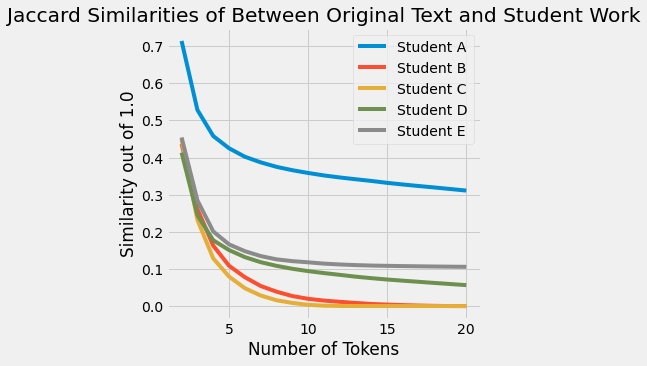

In [39]:
plt.figure(figsize=(5,5))
plt.plot(student_A,label='Student A')
plt.plot(student_B,label='Student B')
plt.plot(student_C,label='Student C')
plt.plot(student_D,label='Student D')
plt.plot(student_E,label='Student E')
plt.title('Jaccard Similarities of Between Original Text and Student Work')
plt.xlabel('Number of Tokens')
plt.ylabel('Similarity out of 1.0')
plt.legend()
#plt.plot(np.arange(0,673,1),two_week_roll,label='two week rolling avg')

#### Question 11

What do the similarity values you calculated say about the five students (A,B,C, D and E)? Is there evidence for plagiarism for any of them? Write a short discussion of your findings.


**Answer:** Of the five students, Student A consistently had the highest similarity between the original text across the 19 different numbers of tokens/letters compared, so there is evidence of plagiarism for this student. For students B and C, the number of tokens that matched the original text dropped very close to zero or no match between their texts and the original, so there is no evidence of plagiarism. For students D and E, there was a higher match between the original and their texts, but it also became around or less than 10% match as the number of tokens compared got higher.

#### Question 12

Assume that the original text is fixed, but that different amounts of it are plagiarized.  How does the length of the plagiarized text impact the Jaccard similarities? For example, would a plagiarized short paper (1-2 sentences) typically have a different Jaccard similarity than a plagiarized long paper (few paragraphs)? Is this important for our five student scenario?

This is an open-ended question. You can answer it by changing the length of a plagiarized text and calculating similarities, you can argue it mathematically, or you can do some combination of these. 



**Answer:** It does make a difference when there is a plagarized short paper versus a long one. I took the jaccard similarities of couple plagarized sentences and the original text and compared it to the jaccard similarities of the same couple of plagarized sentences with the Gettysburg Address pasted onto the end as fluff to increase the length of the paper. When the same two sentences of plagarized text were compared, the one with a bunch of fluff showed much less comparison to the original. This is important because two students could have plagarized the same amount of text, but if one student's was longer and had other non-plagarized things added, their text would show little to no evidence of plagarism. 

In [40]:
# if you use code to make your argument put it here
original
two_sentence_gettysburg = str('However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast link structure as an indicator of an individual page\'s value. Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth')
two_sentence_plag = ('However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast link structure as an indicator of an individual page\'s value.')
#two_paragraph_plag = str('But, Google looks at more than the sheer volume of votes, or links a page receives; it also analyzes the page that casts the vote. Votes cast by pages that are themselves "important" weigh more heavily and help to make other pages "important". \t”\nIn other words, a PageRank results from a "ballot" among all the other pages on the World Wide Web about how important a page is. A hyperlink to a page counts as a vote of support. The PageRank of a page is defined recursively and depends on the number and PageRank metric of all pages that link to it ("incoming links"). A page that is linked to by many pages with high PageRank receives a high rank itself. If there are no links to a web page there is no support for that page.\nGoogle assigns a numeric weighting from 0-10 for each webpage on the Internet; this PageRank denotes a site’s importance in the eyes of Google. The PageRank is derived from a theoretical probability value on a logarithmic scale like the Richter Scale. The PageRank of a particular page is roughly based upon the quantity of inbound links as well as the PageRank of the pages providing the links. It is known that other factors, e.g. relevance of search words on the page and actual visits to the page reported by the Google toolbar also influence the PageRank. In order to prevent manipulation, spoofing and Spamdexing, Google provides no specific details about how other factors influence PageRank.\nNumerous academic papers concerning PageRank have been published since Page and Brin\'s original paper.')
q12_frame = []
def q12_run(student,i):
    return jaccard_simq(original,two_sentence_plag,i)
for i in range(2,21):
    q12_frame.append(q12_run(two_sentence_plag,i))
q12_frame
q12_array = np.asarray(q12_frame)
q12_array = pd.DataFrame(q12_array,columns = ['2 Sentence'])
q12_array = q12_array[2:21]

In [41]:
q12_frame_2 = []
def q12_run_2(student,i):
    return jaccard_simq(original,two_sentence_gettysburg,i)
for i in range(2,21):
    q12_frame_2.append(q12_run_2(two_sentence_gettysburg,i))
q12_frame_2
q12_array_2 = np.asarray(q12_frame_2)
q12_array_2 = pd.DataFrame(q12_array_2,columns = ['2 Paragraph'])
q12_array_2 = q12_array_2[2:21]

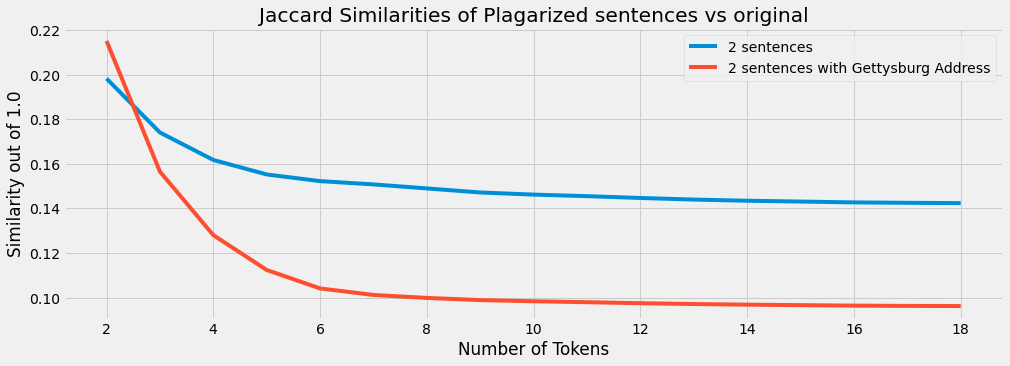

In [42]:
plt.figure(figsize=(15,5))
plt.plot(q12_array,label='2 sentences')
plt.plot(q12_array_2,label='2 sentences with Gettysburg Address')
plt.title('Jaccard Similarities of Plagarized sentences vs original')
plt.xlabel('Number of Tokens')
plt.ylabel('Similarity out of 1.0')
plt.legend()